In [1]:
import random
from math import exp,log
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0,0],[1,0],[0,1],[1,1]])
Y = np.array([0,1,1,1])

In [3]:
class logistic_regression_model():
    def __init__(self):
        self.w = np.random.normal(size=2)
        self.b = np.random.normal(size=1)
    
    def sigmoid(self,z):
        return 1/(1+exp(-z))

    def predict(self,x):
        z = np.inner(self.w,x) + self.b[0]
        a = self.sigmoid(z)
        return a

In [4]:
model = logistic_regression_model()

In [5]:
def train(X,Y,model,lr):
    dw0 = 0.0
    dw1 = 0.0
    db = 0.0
    m = len(X)
    cost = 0.0
    for x,y in zip(X,Y):
        a = model.predict(x)
        if y == 1:
            cost -= log(a)
        else:
            cost -= log(1-a)
            
        x = np.append(x,1)
        [dw0,dw1,db] = [dw0,dw1,db] + ((a-y)*x)
        
    cost /= m
    model.w[0] -= lr * dw0/m
    model.w[1] -= lr * dw1/m
    model.b[0] -= lr * db/m
    
    return cost

In [6]:
def loss():
    loss_ = []
    for i in range(4):
        loss = -Y[i]*log(model.predict(X[i]))-(1-Y[i])*log(1-model.predict(X[i]))
        loss_.append(loss)
    return loss_

In [7]:
for epoch in range(10000):
    cost = train(X,Y,model,0.1)
    if (epoch % 500 == 0):
        print(epoch, cost)

0 0.39110232438581405
500 0.13313322470546998
1000 0.08118507700322522
1500 0.05768187600357369
2000 0.0444863196349876
2500 0.036101023162606466
3000 0.030325502168907364
3500 0.026116137033267973
4000 0.022917195193707877
4500 0.020406658056359068
5000 0.018385507741409304
5500 0.01672432937619563
6000 0.015335434209879316
6500 0.014157352548200646
7000 0.013145746670137742
7500 0.012267849036804038
8000 0.011498930138148762
8500 0.010819982981106447
9000 0.010216162707333065
9500 0.00967570933375489


In [8]:
model.predict([0,0])

0.02028071838868847

In [9]:
model.predict([0,1])

0.9918990960081574

In [10]:
model.predict([1,0])

0.9919006964995172

In [11]:
model.predict([1,1])

0.9999986195313496

In [12]:
loss1 = loss()
loss1

[0.02048919568679007,
 0.008132281043201758,
 0.008133894604576069,
 1.3804696032392662e-06]

In [13]:
for epoch in range(10000):
    cost = train(X,Y,model,0.01)
    if (epoch % 500 == 0):
        print(epoch, cost)

0 0.009189187951042784
500 0.009143196301670493
1000 0.00909765942032791
1500 0.009052570627198003
2000 0.009007923372182324
2500 0.008963711231775744
3000 0.008919927906031936
3500 0.008876567215615375
4000 0.008833623098935567
4500 0.008791089609365439
5000 0.008748960912534366
5500 0.008707231283700555
6000 0.008665895105194346
6500 0.008624946863933945
7000 0.00858438114900888
7500 0.00854419264933064
8000 0.008504376151347902
8500 0.008464926536822957
9000 0.008425838780669685
9500 0.008387107948849616


In [14]:
model.predict([0,0])

0.01843735352427499

In [15]:
model.predict([0,1])

0.992634432680267

In [16]:
model.predict([1,0])

0.9926356351453778

In [17]:
model.predict([1,1])

0.999998965947919

In [18]:
loss2 = loss()
loss2

[0.018609440022082854,
 0.00739161566183332,
 0.007392827048767828,
 1.0340526155937444e-06]

In [19]:
for epoch in range(10000):
    cost = train(X,Y,model,1)
    if (epoch % 500 == 0):
        print(epoch, cost)

0 0.0083487291963249
500 0.0057227673298041876
1000 0.00435037932852004
1500 0.0035077633667670314
2000 0.0029380767752784976
2500 0.002527311883907894
3000 0.0022171627715201524
3500 0.0019747226702422314
4000 0.0017800168450757662
4500 0.0016202204067650428
5000 0.0014867230718874772
5500 0.0013735298571965842
6000 0.0012763384901148611
6500 0.001191981541327709
7000 0.0011180754936525328
7500 0.0010527924220950946
8000 0.000994707064908717
8500 0.0009426917622612921
9000 0.000895842651941952
9500 0.000853426787041881


In [20]:
model.predict([0,0])

0.0018096589618831142

In [21]:
model.predict([0,1])

0.9992762240080232

In [22]:
model.predict([1,0])

0.9992762251422337

In [23]:
model.predict([1,1])

0.9999999990489137

In [24]:
loss3 = loss()
loss3

[0.0018112983728106249,
 0.0007240369092404884,
 0.0007240380442725,
 9.510863212629282e-10]

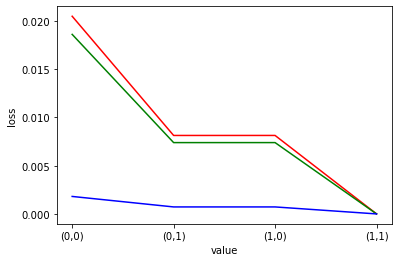

In [26]:
test = ["(0,0)","(0,1)","(1,0)","(1,1)"]
plt.plot(test,loss1,'r')
plt.plot(test,loss2,'g')
plt.plot(test,loss3,'b')
plt.xlabel("value")
plt.ylabel("loss")
plt.show()